In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline
import scipy as sp
import time
import numpy as np 
import pandas as pd
from tabulate import tabulate
from matplotlib import pyplot as plt 
import h5py # used in the Data Visualization section 
import mpl_scatter_density
from astropy.io import fits,ascii,votable
from astropy import units as u 
from astropy import constants as const
from astropy import table
from astropy.table import join
from astropy.cosmology import Planck15,FlatLambdaCDM
from scipy.stats import norm
import statistics
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.tri as mtri
# For ML application
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import mixture
from itertools import combinations
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

In [19]:
def colors(c1, c2, c3, prob, xlabel0= 'i-z', ylabel0= 'r-i', xlabel1 = 'i-y', 
                             ylabel1 = 'r-i', xlabel2 = 'i-y', ylabel2 = 'i-z',
                             title0 = 'r-i vs i-z (1.05 < z < 1.45)',
                             title1 = 'r-i vs i-y (1.05 < z < 1.45)',
                             title2 = 'i-z vs i-y (1.05 < z < 1.45)',
                             xlim0=(-2, 2), ylim0 = (0, 3), xlim1= (-2, 2), 
                             ylim1=(0, 3), xlim2 = (-2, 2), ylim2 = (0, 3),**c_kwargs):
    
    #pcmask = np.logical_and.reduce(prob,colormaskx)

    fig, (ax0, ax1, ax2) = plt.subplots(figsize=(12,4), ncols=3,  constrained_layout = True)
    
    sd0 = ax0.scatter(c1, c2, c=prob, cmap = 'viridis', s = 5, alpha = .1,vmin=0, vmax=1, **c_kwargs)
    sd1 = ax1.scatter(c3, c2, c=prob, cmap = 'viridis', s = 5, alpha = .1,vmin=0, vmax=1, **c_kwargs)
    sd2 = ax2.scatter(c3, c1, c=prob, cmap = 'viridis', s = 5, alpha = .1,vmin=0, vmax=1, **c_kwargs)
    sdummy = ax0.scatter(x = 100, y = 100, c=prob[0], cmap = 'viridis', s = 5, alpha = 1 ,vmin=0, vmax=1, **c_kwargs)
 

    ax0.set_xlim(*xlim0)
    ax0.set_ylim(*ylim0)
    ax0.set_xlabel(xlabel0)
    ax0.set_ylabel(ylabel0)
    ax1.set_xlim(*xlim1)
    ax1.set_ylim(*ylim1)
    ax1.set_xlabel(xlabel1)
    ax1.set_ylabel(ylabel1)
    ax2.set_xlim(*xlim2)
    ax2.set_ylim(*ylim2)
    ax2.set_xlabel(xlabel2)
    ax2.set_ylabel(ylabel2)
    
    cbar = plt.colorbar(sdummy)
    cbar.set_label('predict_probability')
    
    ax0.set_title(title0)
    ax1.set_title(title1)
    ax2.set_title(title2)
    
    return fig



In [27]:
def colorsblack(c1, c2, c3, prob, cmask, xlabel0= 'i-z', ylabel0= 'r-i', xlabel1 = 'i-y', 
                             ylabel1 = 'r-i', xlabel2 = 'i-y', ylabel2 = 'i-z',
                             title0 = 'r-i vs i-z (1.05 < z < 1.45)',
                             title1 = 'r-i vs i-y (1.05 < z < 1.45)',
                             title2 = 'i-z vs i-y (1.05 < z < 1.45)',
                             xlim0=(-2, 2), ylim0 = (0, 3), xlim1= (-2, 2), 
                             ylim1=(0, 3), xlim2 = (-2, 2), ylim2 = (0, 3),**c_kwargs):
    
    #pcmask = np.logical_and.reduce(prob,colormaskx)

    fig, (ax0, ax1, ax2) = plt.subplots(figsize=(12,4), ncols=3,  constrained_layout = True)
    
    sd0 = ax0.scatter(c1, c2, c=prob[cmask] , cmap = 'viridis', s = 5, alpha = .05 ,vmin=0, vmax=1, **c_kwargs)
    sd1 = ax1.scatter(c3, c2, c=prob[cmask] , cmap = 'viridis', s = 5, alpha = .05 ,vmin=0, vmax=1, **c_kwargs)
    sd2 = ax2.scatter(c3, c1, c=prob[cmask] , cmap = 'viridis', s = 5, alpha = .05, vmin=0, vmax=1, **c_kwargs)
    sdummy = ax0.scatter(x = 100, y = 100, c=prob[0], cmap = 'viridis', s = 5, alpha = 1 ,vmin=0, vmax=1, **c_kwargs)
    x = np.arange(.38, 2, .05)
    ax0.set_xlim(*xlim0)
    ax0.set_ylim(*ylim0)
    ax0.set_xlabel(xlabel0)
    ax0.set_ylabel(ylabel0)
    ax0.axvline(x = 0.35, c = 'black')
    ax0.plot(x,x, c = 'black')
    ax1.set_xlim(*xlim1)
    ax1.set_ylim(*ylim1)
    ax1.set_xlabel(xlabel1)
    ax1.set_ylabel(ylabel1)
    ax1.plot(x,x, c = 'black')
    ax1.axvline(x = 0.40, ymin = -.50, ymax = .32, c = 'black') 
    ax2.set_xlim(*xlim2)
    ax2.set_ylim(*ylim2)
    ax2.set_xlabel(xlabel2)
    ax2.set_ylabel(ylabel2)
    ax2.axhline(y=.35, c = 'black') 
    
    cbar = plt.colorbar(sdummy)
    cbar.set_label('predict_probability')
    
    ax0.set_title(title0)
    ax1.set_title(title1)
    ax2.set_title(title2)
    
    return fig

In [4]:
def colorsblackz(c1, c2, c3, prob, cmask, xlabel0= 'i-z', ylabel0= 'r-i', xlabel1 = 'i-y', 
                             ylabel1 = 'r-i', xlabel2 = 'i-y', ylabel2 = 'i-z',
                             title0 = 'r-i vs i-z (1.05 < z < 1.45)',
                             title1 = 'r-i vs i-y (1.05 < z < 1.45)',
                             title2 = 'i-z vs i-y (1.05 < z < 1.45)',
                             xlim0=(-2, 2), ylim0 = (0, 3), xlim1= (-2, 2), 
                             ylim1=(0, 3), xlim2 = (-2, 2), ylim2 = (0, 3),**c_kwargs):
    
    #pcmask = np.logical_and.reduce(prob,colormaskx)

    fig, (ax0, ax1, ax2) = plt.subplots(figsize=(12,4), ncols=3,  constrained_layout = True)
    
    sd0 = ax0.scatter(c1, c2, c=prob[cmask] , cmap = 'viridis', s = 5, alpha = .05 ,vmin=0, vmax=1, **c_kwargs)
    sd1 = ax1.scatter(c3, c2, c=prob[cmask] , cmap = 'viridis', s = 5, alpha = .05 ,vmin=0, vmax=1, **c_kwargs)
    sd2 = ax2.scatter(c3, c1, c=prob[cmask] , cmap = 'viridis', s = 5, alpha = .05, vmin=0, vmax=1, **c_kwargs)
    sdummy = ax0.scatter(x = 100, y = 100, c=prob[0], cmap = 'viridis', s = 5, alpha = 1 ,vmin=0, vmax=1, **c_kwargs)
    x = np.arange(.40, 2, .05)
    ax0.set_xlim(*xlim0)
    ax0.set_ylim(*ylim0)
    ax0.set_xlabel(xlabel0)
    ax0.set_ylabel(ylabel0)
    ax0.axvline(x = 0.35, c = 'black') 
    ax1.set_xlim(*xlim1)
    ax1.set_ylim(*ylim1)
    ax1.set_xlabel(xlabel1)
    ax1.set_ylabel(ylabel1)
    ax1.plot(x,x, c = 'black')
    ax1.axvline(x = 0.40, ymin = -.50, ymax = .32, c = 'black') 
    ax2.set_xlim(*xlim2)
    ax2.set_ylim(*ylim2)
    ax2.set_xlabel(xlabel2)
    ax2.set_ylabel(ylabel2)
    ax2.axhline(y=.35, c = 'black') 
    
    cbar = plt.colorbar(sdummy)
    cbar.set_label('photoz')
    
    ax0.set_title(title0)
    ax1.set_title(title1)
    ax2.set_title(title2)
    
    return fig





In [5]:
# Specify the version of the catalog and the folder with the input/output files
catversion = 'Farmer'  # this string can be either 'Classic' or 'Farmer'
dir_in = '/Users/yokisalcedo/Desktop/data/'  
dir_out = '/Users/yokisalcedo/Desktop/data/' # the directory where the output of this notebook will be stored
# Upload the main catalogue
cat = table.Table.read(dir_in+'COSMOS2020_{}_jan_processed.fits'.format(catversion),format='fits',hdu=1)

In [6]:
#All possible non-redundant colors are listed below:
#u: ug ,ur ,ui ,uz , uy
#g: gr, gi, gz, gy
#r: ri, rz, ry
#i: iz, iy
#z: zy

ug = cat['CFHT_u_MAG'] - cat['HSC_g_MAG'] 
ur = cat['CFHT_u_MAG'] - cat['HSC_r_MAG']
ui = cat['CFHT_u_MAG'] - cat['HSC_i_MAG']
uz = cat['CFHT_u_MAG'] - cat['HSC_z_MAG'] 
uy = cat['CFHT_u_MAG'] - cat['HSC_y_MAG']
gr = cat['HSC_g_MAG'] - cat['HSC_r_MAG']
gi = cat['HSC_g_MAG'] - cat['HSC_i_MAG']
gz = cat['HSC_g_MAG'] - cat['HSC_z_MAG']
gy = cat['HSC_g_MAG'] - cat['HSC_y_MAG']
ri = cat['HSC_r_MAG'] - cat['HSC_i_MAG']
rz = cat['HSC_r_MAG'] - cat['HSC_z_MAG']
ry = cat['HSC_r_MAG'] - cat['HSC_y_MAG']
iz = cat['HSC_i_MAG'] - cat['HSC_z_MAG']
iy = cat['HSC_i_MAG'] - cat['HSC_y_MAG']
zy = cat['HSC_z_MAG'] - cat['HSC_y_MAG']
catpd = cat.to_pandas()
catpd['ug']=ug
catpd['ur']=ur
catpd['ui']=ui
catpd['uz']=uz
catpd['uy']=uy
catpd['gr']=gr
catpd['gi']=gi
catpd['gz']=gz
catpd['gy']=gy
catpd['ri']=ri
catpd['rz']=rz
catpd['ry']=ry
catpd['iz']=iz
catpd['iy']=iy
catpd['zy']=zy
colormaskx = np.logical_and.reduce((np.isfinite(cat['HSC_r_MAG']),
                                    np.isfinite(cat['photoz']),
                                    np.isfinite(cat['HSC_g_MAG']),np.isfinite(cat['HSC_i_MAG']),
                                    np.isfinite(cat['HSC_y_MAG']),np.isfinite(cat['CFHT_u_MAG']),
                                    np.isfinite(cat['HSC_z_MAG']),
                                    (cat['HSC_r_MAG']<24.5),
                                    (cat['HSC_i_MAG']<24.5),(cat['photoz']<4)))
#npri = np.array(xalln)[:,9]





In [7]:
#Here we defind our narrow and broad zcut, all RF, 3 RF
#(xalln, yn, zalln, galln), (x3n, yn, z3n, g3n), (xallb, yb, zallb , gallb ), (x3b, yb, z3b, g3b)
zcutn = np.logical_and(cat['photoz'] > 1.05, cat['photoz'] < 1.45)
zcutb = np.logical_and(cat['photoz'] > 1.05, cat['photoz'] < 1.55)
xalln = catpd.loc[colormaskx,['ug','ur', 'ui', 'uz', 'uy', 'gr', 'gi', 'gz', 'gy', 'ri', 'rz', 'ry', 'iz', 'iy', 'zy','HSC_r_MAG','HSC_i_MAG','HSC_y_MAG','HSC_z_MAG','CFHT_u_MAG', 'HSC_g_MAG']]
xallb = catpd.loc[colormaskx,['ug','ur', 'ui', 'uz', 'uy', 'gr', 'gi', 'gz', 'gy', 'ri', 'rz', 'ry', 'iz', 'iy', 'zy','HSC_r_MAG','HSC_i_MAG','HSC_y_MAG','HSC_z_MAG','CFHT_u_MAG', 'HSC_g_MAG']]
x3n=catpd.loc[colormaskx,[ 'ri', 'iz', 'iy']]
x3b=catpd.loc[colormaskx,[ 'ri', 'iz', 'iy']]
zalln = cat['photoz'][colormaskx]
zallb = cat['photoz'][colormaskx]
z3n = cat['photoz'][colormaskx]
z3b = cat['photoz'][colormaskx]
galln = catpd.loc[colormaskx,['HSC_g_MAG']]
gallb = catpd.loc[colormaskx,['HSC_g_MAG']]
g3n = catpd.loc[colormaskx,['HSC_g_MAG']]
g3b = catpd.loc[colormaskx,['HSC_g_MAG']]
yn = zcutn[colormaskx]
yb = zcutb[colormaskx]
y3n = zcutn[colormaskx]
y3b = zcutb[colormaskx]

In [8]:
#Defining our classiffier and splitting training and testing data(1.05 <z <1.45) with all RF (xalln, yn, zalln, galln)
xalln_train, xalln_test, yn_train, yn_test, zalln_train, zalln_test, galln_train, galln_test = train_test_split(xalln, yn, zalln, galln )
clfall_n = RandomForestClassifier()
clfall_n.fit(xalln_train, yn_train)
predalln = np.array(clfall_n.predict(xalln_test))
proballn = np.array(clfall_n.predict_proba(xalln_test))
istrue_alln = (predalln == True)
isfalse_alln = (predalln == False)



In [9]:
#(xallb, yb, zallb , gallb )
xallb_train, xallb_test, yb_train, yb_test, zallb_train, zallb_test, gallb_train, gallb_test = train_test_split(xallb, yb, zallb, gallb )
clfall_b = RandomForestClassifier()
clfall_b.fit(xallb_train, yb_train)
predallb = np.array(clfall_b.predict(xallb_test))
proballb = np.array(clfall_b.predict_proba(xallb_test))
istrue_allb = (predallb == True)
isfalse_allb = (predalln == False)





In [10]:
#(x3n, y3n, z3n, g3n)
x3n_train, x3n_test, y3n_train, y3n_test, z3n_train, z3n_test, g3n_train, g3n_test = train_test_split(x3n, y3n, z3n, g3n )
clf3_n = RandomForestClassifier()
clf3_n.fit(x3n_train, yn_train)
pred3n = np.array(clf3_n.predict(x3n_test))
prob3n = np.array(clf3_n.predict_proba(x3n_test))
istrue_3n = (pred3n == True)
isfalse_3n = (pred3n == False)

In [11]:
#(x3b, y3b, z3b, g3b)
x3b_train, x3b_test, y3b_train, y3b_test, z3b_train, z3b_test, g3b_train, g3b_test = train_test_split(x3b, y3b, z3b, g3b )
clf3_b = RandomForestClassifier()
clf3_b.fit(x3b_train, yb_train)
pred3b = np.array(clf3_b.predict(x3b_test))
prob3b = np.array(clf3_b.predict_proba(x3b_test))
istrue_3b = (pred3b == True)
isfalse_3b = (pred3b == False)

In [36]:
cutsblackb = np.logical_or.reduce((
    xallb_test['iy'].values > 0.4, 
    xallb_test['ri'].values < xallb_test['iy'].values))

#cutsblackn =  np.logical_or.reduce((
   # xalln_test['iy'].values > 0.4, 
    #xalln_test['ri'].values < xalln_test['iy'].values,
   # xalln_test['ri'].values < xalln_test['iz'].values
    
#))

#cutsblack3n =  np.logical_or(
    #x3n_test['iy'].values < 0.4, 
    #x3n_test['ri'].values > x3n_test['iy'].values
#)
#cutsblack3b =  np.logical_or(
    #x3b_test['iy'].values < 0.4, 
    #x3b_test['ri'].values > x3b_test['iy'].values
#)



notcutsblackb = ~cutsblackb
notcutsblackn = ~cutsblackn
notcutsblack3n = ~cutsblack3n
notcutsblackn = ~cutsblack3b

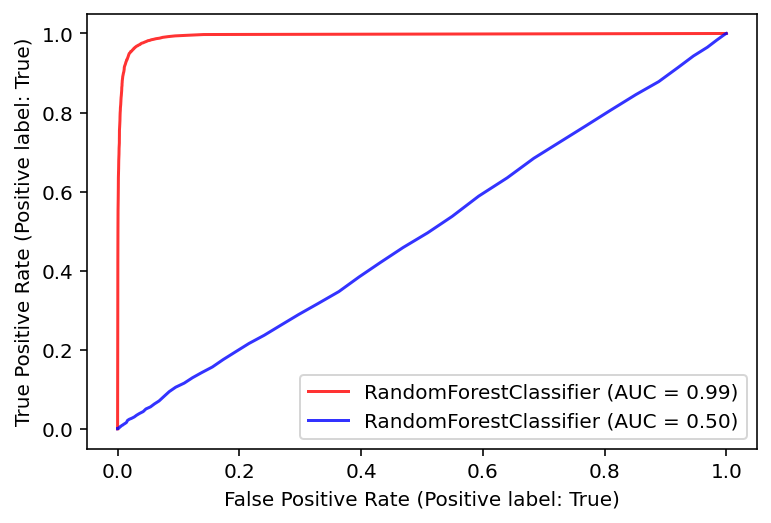

In [13]:
#ROC curve for narrow ( 1.05 < z < 1.55) using estimator all RF in red and 3 RF in blue 
ax = plt.gca()
clfallbe_disp = RocCurveDisplay.from_estimator(clfall_b, xallb_test, yb_test, ax=ax, c= 'red', alpha=0.8)
#plt.show()
ax = plt.gca()
clf3be_disp = RocCurveDisplay.from_estimator(clf3_b, x3b_test, y3b_test, ax=ax, c= 'blue', alpha=0.8)
#plt.show()







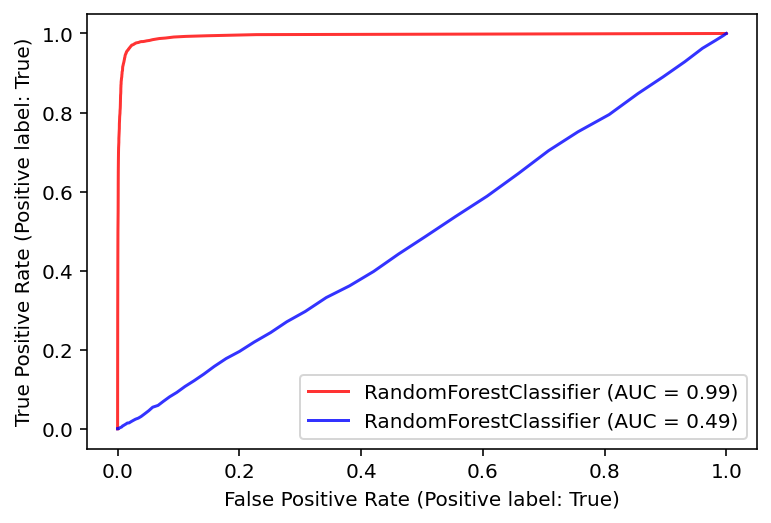

In [14]:
#ROC curve for narrow ( 1.05 < z < 1.45) using estimator all RF in red and 3 RF in blue 
ax = plt.gca()
clfallne_disp = RocCurveDisplay.from_estimator(clfall_n, xalln_test, yn_test, ax=ax, c ='red', alpha=0.8)

ax = plt.gca()
clf3ne_disp = RocCurveDisplay.from_estimator(clf3_n, x3n_test, y3n_test, ax=ax, c= 'blue', alpha=0.8)






In [ ]:
'''We need to reconsider our cuts for selection. Look at the color color figures again color coded with the predict_prob'''

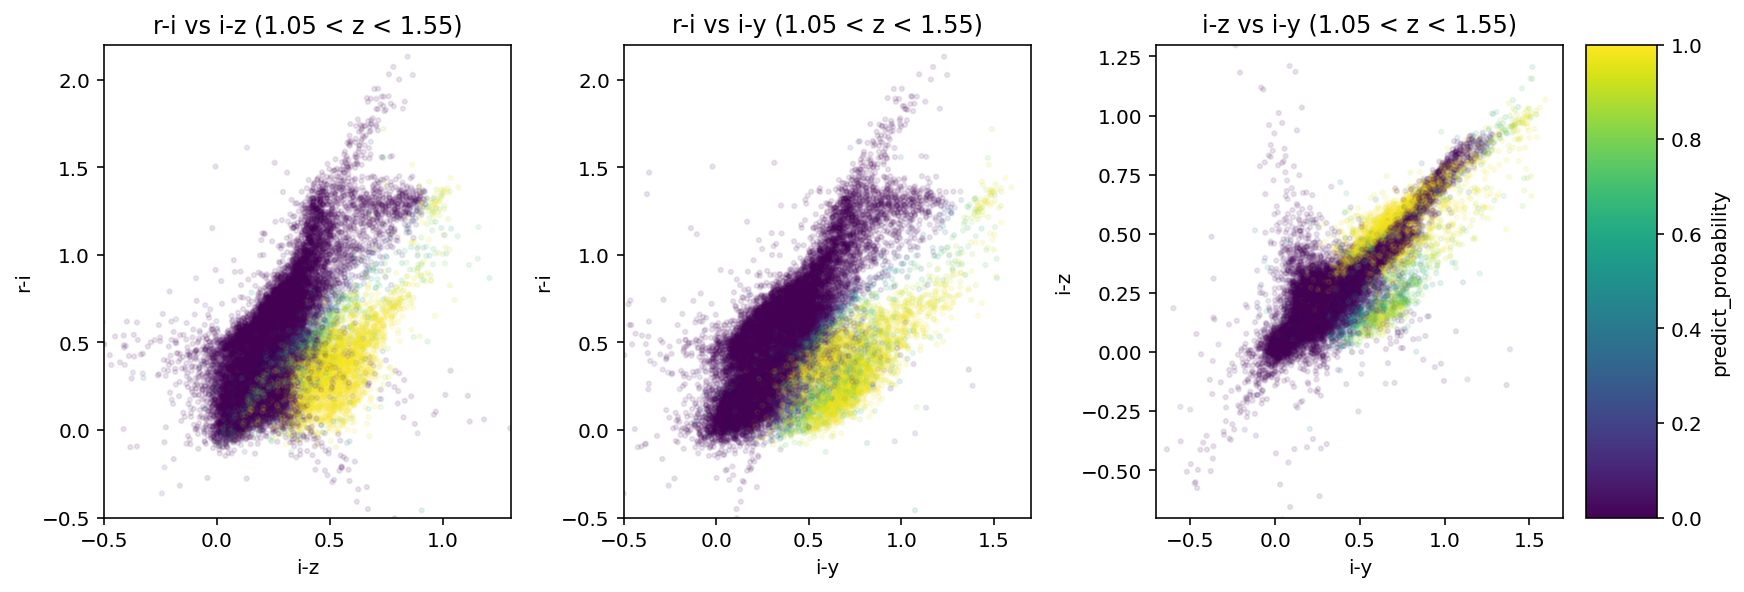

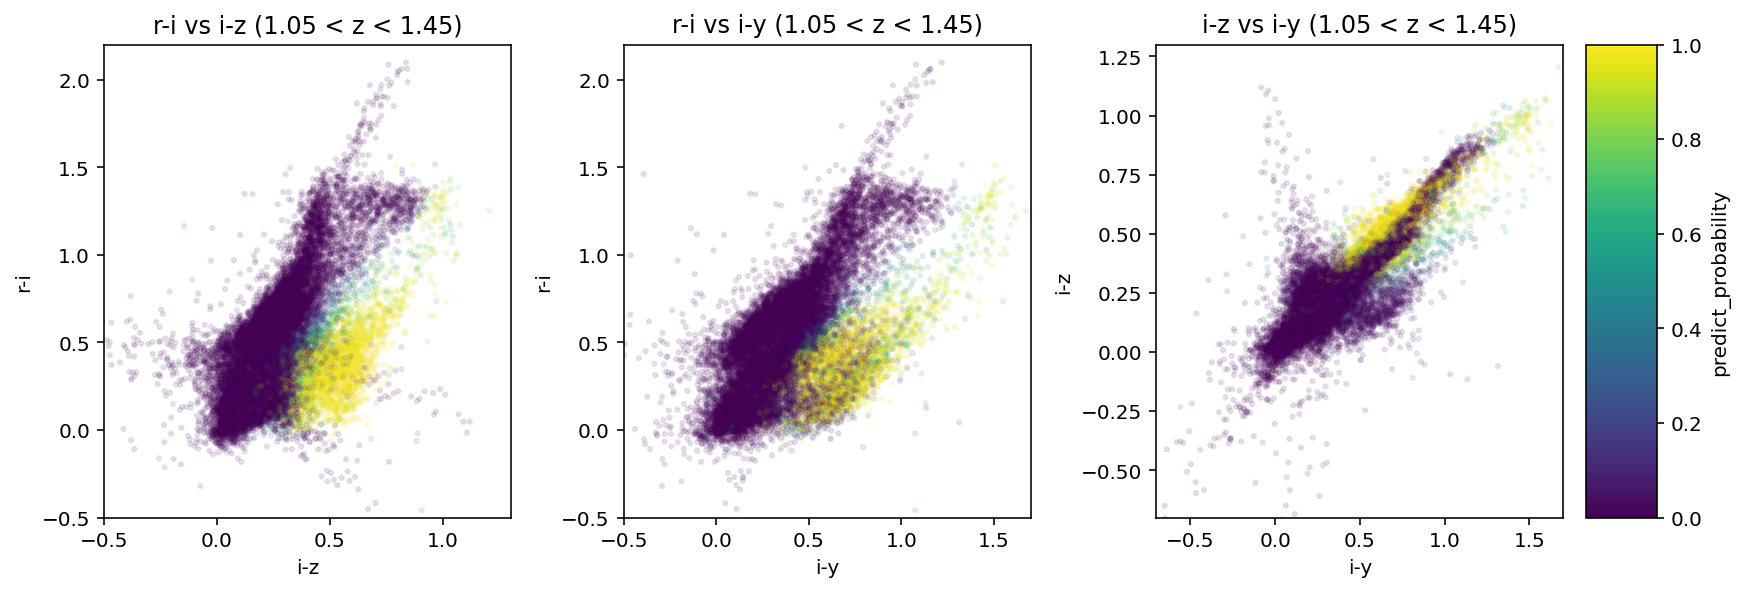

In [20]:
fig0 = colors(xallb_test['iz'], xallb_test['ri'], xallb_test['iy'], proballb[:, 1], xlim0 = (-.5,1.3), ylim0 = (-.5,2.2), xlim1 = (-.5,1.7), ylim1 = (-.5,2.2), xlim2 = (-.7,1.7), ylim2 = (-.7,1.3), title0 = 'r-i vs i-z (1.05 < z < 1.55)', title1 = 'r-i vs i-y (1.05 < z < 1.55)', title2 = 'i-z vs i-y (1.05 < z < 1.55)')
fig1 = colors(xalln_test['iz'], xalln_test['ri'], xalln_test['iy'], proballn[:, 1], xlim0 = (-.5,1.3), ylim0 = (-.5,2.2), xlim1 = (-.5,1.7), ylim1 = (-.5,2.2), xlim2 = (-.7,1.7), ylim2 = (-.7,1.3))
plt.rcParams['figure.constrained_layout.use'] = True





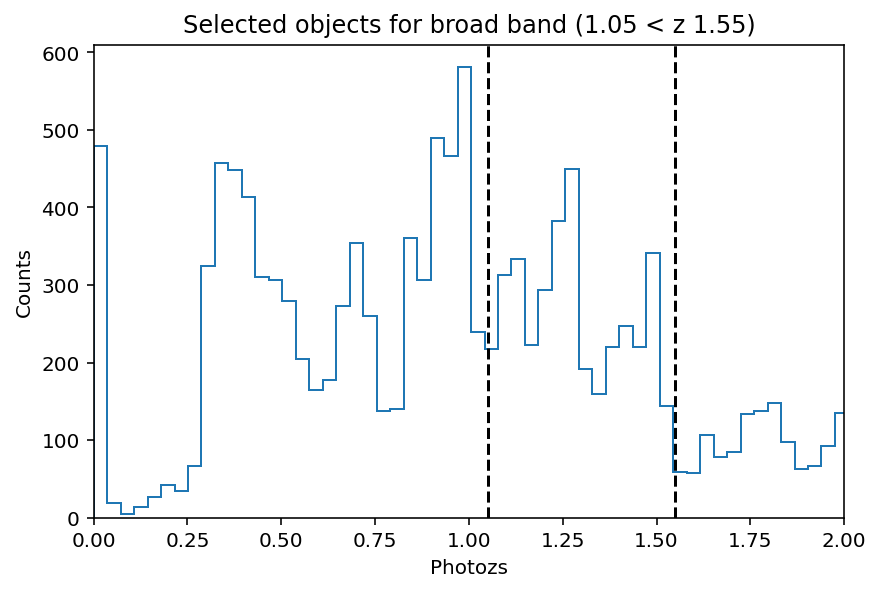

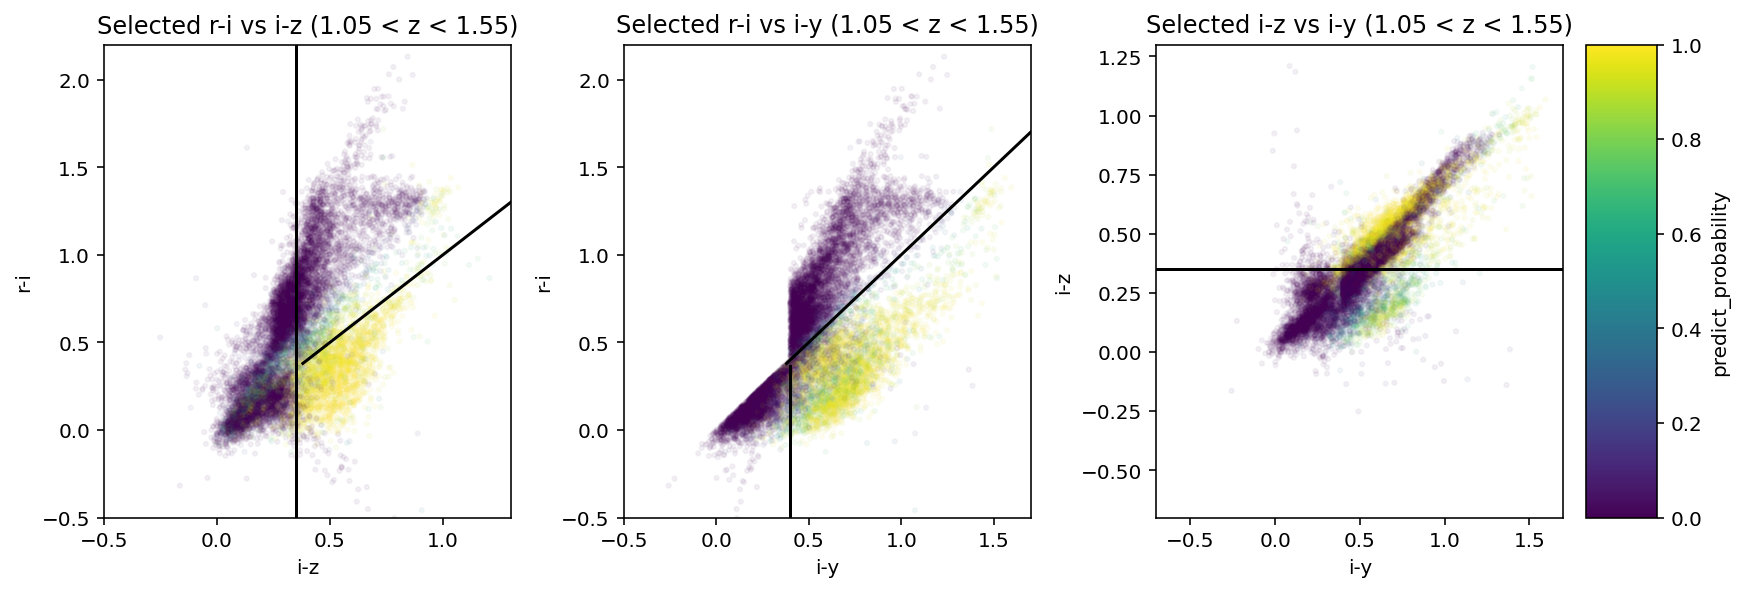

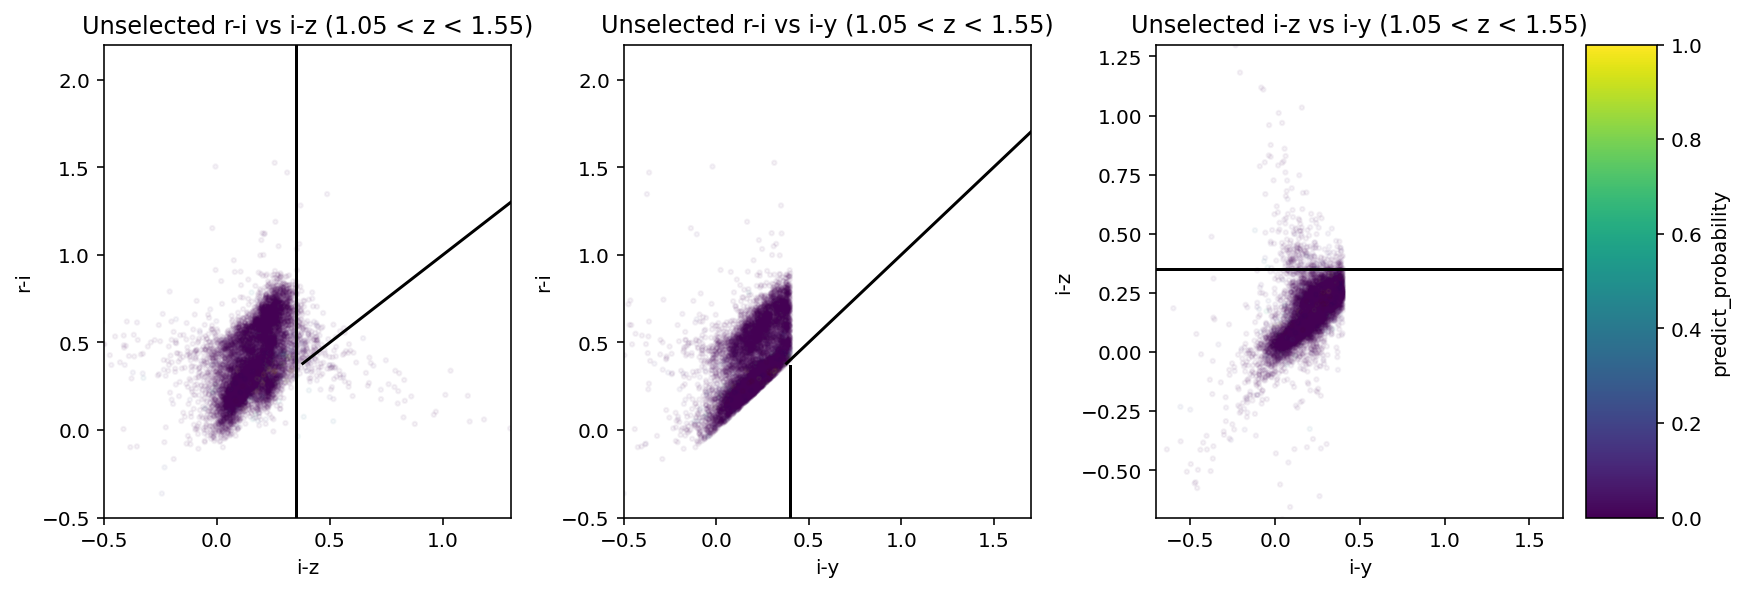

In [37]:
fig, ax = plt.subplots()
    
selectb = ax.hist(zallb_test[cutsblackb], bins = 100, histtype= 'step')
 
ax.set_xlim(0,2)
ax.set_xlabel('Photozs')
ax.set_ylabel('Counts')
ax.axvline(x = 1.05,ls= '--', color='black')
ax.axvline(x = 1.55,ls= '--', color='black')
ax.set_title('Selected objects for broad band (1.05 < z 1.55)')

figcutblackb = colorsblack(xallb_test['iz'].values[cutsblackb], xallb_test['ri'].values[cutsblackb], xallb_test['iy'].values[cutsblackb], proballb[:, 1], cutsblackb, xlim0 = (-.5,1.3), ylim0 = (-.5,2.2), xlim1 = (-.5,1.7), ylim1 = (-.5,2.2), xlim2 = (-.7,1.7), ylim2 = (-.7,1.3), title0 = 'Selected r-i vs i-z (1.05 < z < 1.55)', title1 = 'Selected r-i vs i-y (1.05 < z < 1.55)', title2 = 'Selected i-z vs i-y (1.05 < z < 1.55)') 
fignotcutblackb = colorsblack(xallb_test['iz'].values[notcutsblackb], xallb_test['ri'].values[notcutsblackb], xallb_test['iy'].values[notcutsblackb], proballb[:, 1], notcutsblackb, xlim0 = (-.5,1.3), ylim0 = (-.5,2.2), xlim1 = (-.5,1.7), ylim1 = (-.5,2.2), xlim2 = (-.7,1.7), ylim2 = (-.7,1.3), title0 = 'Unselected r-i vs i-z (1.05 < z < 1.55)', title1 = 'Unselected r-i vs i-y (1.05 < z < 1.55)', title2 = 'Unselected i-z vs i-y (1.05 < z < 1.55)')

In [ ]:
'''What to do:''' #Run the cells and plot the color color and photoz distribution using appropriate cuts without function
#check consistency